In [1]:
import time
import csv
import math
import pickle
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from collections import defaultdict

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer


#Pre-processing
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score

import string
import re
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
csv_path ='BBC_News_Train.csv'

In [3]:
df = pd.read_csv(csv_path)
df.head(10)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


In [4]:
#Dropping ArticleId Column
df_new = df.drop(['ArticleId'], axis=1)

In [5]:
df_new.head(10)

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
5,howard truanted to play snooker conservative...,politics
6,wales silent on grand slam talk rhys williams ...,sport
7,french honour for director parker british film...,entertainment
8,car giant hit by mercedes slump a slump in pro...,business
9,fockers fuel festive film chart comedy meet th...,entertainment


In [6]:
# checking for any empty cell
df_new.isnull().sum()

Text        0
Category    0
dtype: int64

In [7]:
df_new.shape

(1490, 2)

In [8]:
df_new.head(10)

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
5,howard truanted to play snooker conservative...,politics
6,wales silent on grand slam talk rhys williams ...,sport
7,french honour for director parker british film...,entertainment
8,car giant hit by mercedes slump a slump in pro...,business
9,fockers fuel festive film chart comedy meet th...,entertainment


In [9]:
df_new.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

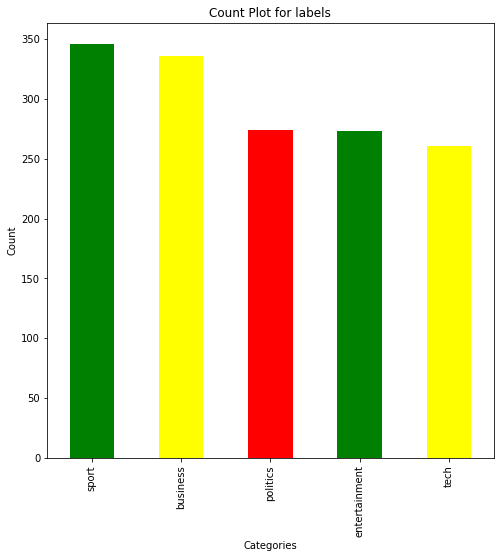

In [10]:
# Count plot for labels feature
plt.figure(figsize=(8,8))
df_new.Category.value_counts().plot(kind='bar',color=['green','yellow','red'])

plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Count Plot for labels");

In [11]:
# Load the final dataset
df = df_new
df.head(10)

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
5,howard truanted to play snooker conservative...,politics
6,wales silent on grand slam talk rhys williams ...,sport
7,french honour for director parker british film...,entertainment
8,car giant hit by mercedes slump a slump in pro...,business
9,fockers fuel festive film chart comedy meet th...,entertainment


**Pre-processing...**

In [12]:
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Lowercase the text
def lowercase(text):
    return text.lower()

# Tokenize the text
def tokenize(text):
    return nltk.word_tokenize(text)

# Remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

# Remove punctuations
def remove_punctuation(tokens):
    return [token for token in tokens if token not in string.punctuation]

# Remove blank space tokens
def remove_blanks(tokens):
    return [token for token in tokens if token.strip()]


def stem_text(words):
    # Initialize a Porter stemmer
    stemmer = PorterStemmer()
    # Stem each word in the list of words
    stemmed_words = [stemmer.stem(word) for word in words]
    
    return stemmed_words


def lemmatize_text(words):
    # Initialize a WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return lemmatized_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# A function that applies all preprocessing steps
def preprocess_text(raw_text):

    text = re.sub(r'[^a-zA-Z]',' ',raw_text)
    
    lowercase_text = lowercase(text)

    tokenize_tokens = tokenize(lowercase_text)

    remove_stopwords_tokens = remove_stopwords(tokenize_tokens)

    remove_punctuation_tokens = remove_punctuation(remove_stopwords_tokens)
    
    lemmetized_tokens = lemmatize_text(remove_punctuation_tokens)
    
    stemmed_tokens = stem_text(lemmetized_tokens)
    
    remove_blanks_tokens = remove_blanks(stemmed_tokens)
    
    return ' '.join(remove_blanks_tokens)

In [14]:
df['Text'] = df['Text'].apply(preprocess_text)

In [15]:
df.head(10)

,Text,Category
0,worldcom ex bo launch defenc lawyer defend for...,business
1,german busi confid slide german busi confid fe...,business
2,bbc poll indic econom gloom citizen major nati...,business
3,lifestyl govern mobil choic faster better funk...,tech
4,enron boss payout eighteen former enron direct...,business
5,howard truant play snooker conserv leader mich...,politics
6,wale silent grand slam talk rhi william say wa...,sport
7,french honour director parker british film dir...,entertainment
8,car giant hit merced slump slump profit luxuri...,business
9,focker fuel festiv film chart comedi meet fock...,entertainment


In [16]:
df.to_csv('file_preprocessed.csv', header=False, index=False)

In [17]:
dataset = []
with open('file_preprocessed.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        dataset.append(row)

In [18]:
# Split the text and categories into separate lists for tf-idf calculation
text = [row[0] for row in dataset]
categories = [row[1] for row in dataset]

In [19]:
def calculate_tf_icf(text, categories):
    # Step 1: Calculate the term frequency for each word in the corpus
    tf = defaultdict(int)
    for doc in text:
        for word in doc.split():
            tf[word] += 1
    
    # Step 2: Calculate the inverse category frequency for each word in the corpus
    icf = defaultdict(int)
    num_docs = len(text)
    for doc in text:
        categories_in_doc = set([cat for cat in categories[text.index(doc)].split(",")])
        for word in set(doc.split()):
            icf[word] += 1 / (1 + len(categories_in_doc))
    
    # Step 3: Calculate the TF-ICF value for each word in the corpus
    tf_icf = {}
    for word in tf:
        tf_icf[word] = tf[word] * math.log(num_docs / icf[word])
    
    return tf_icf


In [20]:
# Calculate the TF-ICF score for each word
tf_icf = calculate_tf_icf(text, categories)


In [21]:
# Convert the text data into a matrix of TF-ICF scores
vectorizer = CountVectorizer(vocabulary = tf_icf.keys())
X = vectorizer.transform(text)

The CountVectorizer object is responsible for constructing the document-term matrix based on the input text data. In the above code, we provide the vocabulary parameter to the CountVectorizer object, which is a dictionary containing the words in the corpus as keys and their corresponding tf_icf values as values. By setting the vocabulary parameter in this way, we are telling the CountVectorizer object to only consider the words in the input text data that are present in the tf_icf dictionary, and to use their corresponding tf_icf values as the weights when constructing the document-term matrix.

Therefore, the tf_icf values are used indirectly in the training process of the Naive Bayes classifier by influencing the way the document-term matrix is constructed.

In [23]:
X.shape

(1490, 15996)

In [24]:
len(categories)

1490

In [25]:
# Split the dataset into training and testing sets for training

X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size=0.3, random_state=42)

Calculating the probability of each category based on the frequency of documents in the training set that belong to that category.

In [26]:
def calculate_category_probabilities(categories):
    category_counts = {}
    total_documents = len(categories)

    # count the number of documents in each category
    for category in categories:
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1

    # calculate the probability of each category
    category_probabilities = {}
    for category, count in category_counts.items():
        category_probabilities[category] = count / total_documents

    return category_probabilities



In [27]:
category_probabilities = calculate_category_probabilities(y_train)

In [28]:
category_probabilities

{'entertainment': 0.1860019175455417,
 'tech': 0.18024928092042186,
 'politics': 0.18024928092042186,
 'business': 0.21860019175455417,
 'sport': 0.2348993288590604}

To calculate the probability of each feature given each category based on the TF-ICF values of that feature in documents belonging to that category, we can use the following approach:

For each category, we create a dictionary of TF-ICF values for each feature in documents belonging to that category.

We Calculate the sum of TF-ICF values for all features in each category.

For each category, we divide the TF-ICF value of each feature by the sum of TF-ICF values for all features in that category to get the probability of that feature given that category.

In [29]:
def calculate_feature_probabilities(text, categories, tf_icf):
    # Step 1: Create a dictionary of TF-ICF values for each feature in each category
    feature_tf_icf = {}
    for i, doc in enumerate(text):
        category = categories[i]
        if category not in feature_tf_icf:
            feature_tf_icf[category] = defaultdict(float)
        for word in set(doc.split()):
            feature_tf_icf[category][word] += tf_icf[word]
    
    # Step 2: Calculate the sum of TF-ICF values for all features in each category
    category_tf_icf_sum = {}
    for category in feature_tf_icf:
        category_tf_icf_sum[category] = sum(feature_tf_icf[category].values())
    
    # Step 3: Calculate the probability of each feature given each category based on TF-ICF values
    feature_probabilities = {}
    for category in feature_tf_icf:
        feature_probabilities[category] = {}
        for word in feature_tf_icf[category]:
            feature_probabilities[category][word] = feature_tf_icf[category][word] / category_tf_icf_sum[category]
    
    return feature_probabilities


In [30]:
feature_probabilities = calculate_feature_probabilities(text, categories, tf_icf)

In [31]:
feature_probabilities

{'business': {'week': 0.0033414090870176904,
  'andersen': 8.40681541246526e-07,
  'buyout': 6.127117733895434e-06,
  'unawar': 7.734420999857828e-06,
  'estim': 0.0005817058070589236,
  'technic': 7.074065626791237e-05,
  'alert': 1.395960864011155e-05,
  'mr': 0.017317776124330442,
  'juri': 9.379710335543432e-06,
  'year': 0.022861847104106842,
  'answer': 2.4955579653318177e-05,
  'irregular': 1.634822454294965e-05,
  'charg': 0.0010551910149630074,
  'financi': 0.0020892278852999283,
  'mention': 3.4370359572638264e-05,
  'hit': 0.0022383982233895663,
  'scott': 3.759241363731164e-05,
  'sentenc': 7.981558711188956e-05,
  'verizon': 3.1428161969963617e-05,
  'new': 0.011587417439489297,
  'defenc': 0.00016842573039125286,
  'extern': 2.001004871582599e-05,
  'seri': 0.00029554930302466893,
  'anyth': 7.966535963523899e-05,
  'pass': 0.00013588840523081553,
  'bankruptci': 0.0004365452783398875,
  'said': 0.04929713910944529,
  'worldcom': 0.0001370571082048336,
  'consult': 0.0001

In [32]:
accuracies = []
exp = []

In [33]:
# Training a Naive Bayes classifier on the TF-ICF weighted data
clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [34]:
# Making predictions on the testing set and evaluating the performance
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
Split_70_30 = accuracy_score(y_test, y_pred)
accuracies.append(Split_70_30)
exp.append('Split_70_30')
print(classification_report(y_test, y_pred))

Accuracy: 0.9798657718120806
               precision    recall  f1-score   support

     business       0.98      0.97      0.98       108
entertainment       1.00      0.97      0.99        79
     politics       0.95      0.98      0.97        86
        sport       1.00      0.99      1.00       101
         tech       0.96      0.99      0.97        73

     accuracy                           0.98       447
    macro avg       0.98      0.98      0.98       447
 weighted avg       0.98      0.98      0.98       447



5. Improving the classifier:

● Experiment with different preprocessing techniques and parameters to improve
the performance of the classifier( including different splits like 60-40,80-20,
50-50).

● Try using different types of features such as n-grams or TF-IDF weights.

● Evaluate the performance of the classifier after each experiment and compare it
with the previous results.

In [35]:
# Split the dataset into training and testing sets
# Different size of train test splits [80-20, 60-40, 50-50]

split_sizes = [0.2, 0.4, 0.5]

x_train_list=[]
x_test_list=[]
y_train_list=[]
y_test_list=[]

for i in range(len(split_sizes)):
    x_train, x_test, y_train, y_test = train_test_split(X, categories, test_size=split_sizes[i], random_state=42) 

    x_train_list.append(x_train)
    x_test_list.append(x_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)


In [36]:
#split_sizes = [0.2, 0.4, 0.5]

In [37]:
#Training a Naive Bayes classifier on different splits
y_preds = []
for i in range(len(split_sizes)):
    #clf.fit(X_train, y_train)
    clf = MultinomialNB()
    clf.fit(x_train_list[i], y_train_list[i])
    y_preds.append(clf.predict(x_test_list[i]))

**Testing with 80-20 split**

In [38]:
print("Testing with 80-20 split")
#split_sizes = [0.2, 0.4, 0.5]

print("Accuracy:", accuracy_score(y_test_list[0], y_preds[0]))

Split_80_20 = accuracy_score(y_test_list[0], y_preds[0])
accuracies.append(Split_80_20)
exp.append('Split_80_20')

print(classification_report(y_test_list[0], y_preds[0]))

Testing with 80-20 split
Accuracy: 0.9765100671140939
               precision    recall  f1-score   support

     business       0.97      0.97      0.97        75
entertainment       1.00      0.96      0.98        46
     politics       0.95      0.96      0.96        56
        sport       1.00      1.00      1.00        63
         tech       0.97      0.98      0.97        58

     accuracy                           0.98       298
    macro avg       0.98      0.98      0.98       298
 weighted avg       0.98      0.98      0.98       298



**Testing with 60-40 split**

In [39]:
print("Testing with 60-40 split")
#split_sizes = [0.2, 0.4, 0.5]

print("Accuracy:", accuracy_score(y_test_list[1], y_preds[1]))
Split_60_40 = accuracy_score(y_test_list[1], y_preds[1])
accuracies.append(Split_60_40)
exp.append('Split_60_40')
print(classification_report(y_test_list[1], y_preds[1]))

Testing with 60-40 split
Accuracy: 0.9781879194630873
               precision    recall  f1-score   support

     business       0.99      0.97      0.98       137
entertainment       1.00      0.96      0.98       109
     politics       0.95      0.97      0.96       109
        sport       1.00      0.99      1.00       129
         tech       0.95      0.99      0.97       112

     accuracy                           0.98       596
    macro avg       0.98      0.98      0.98       596
 weighted avg       0.98      0.98      0.98       596



**Testing with 50-50 split**

In [40]:
print("Testing with 50-50 split")
#split_sizes = [0.2, 0.4, 0.5]

print("Accuracy:", accuracy_score(y_test_list[2], y_preds[2]))
Split_50_50 = accuracy_score(y_test_list[2], y_preds[2])
accuracies.append(Split_50_50)
exp.append('Split_50_50')
print(classification_report(y_test_list[2], y_preds[2]))

Testing with 50-50 split
Accuracy: 0.978523489932886
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       171
entertainment       1.00      0.97      0.98       130
     politics       0.97      0.97      0.97       142
        sport       1.00      0.99      1.00       164
         tech       0.94      0.99      0.97       138

     accuracy                           0.98       745
    macro avg       0.98      0.98      0.98       745
 weighted avg       0.98      0.98      0.98       745



**Testing with n-grams split**

In [56]:
# Convert the text data into a matrix of n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(text)


In [57]:
# Split the dataset into training and testing sets for training
X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size=0.3, random_state=42)


In [58]:
# Train a Naive Bayes classifier on the n-gram features
clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [61]:
# Make predictions on the testing set and evaluate the performance
y_pred = clf.predict(X_test)
print("Accuracy with n-grams:", accuracy_score(y_test, y_pred))
Split_n_grams = accuracy_score(y_test, y_pred)
accuracies.append(Split_n_grams)
exp.append('Split_n_grams')
print(classification_report(y_test, y_pred))

Accuracy with n-grams: 0.9753914988814317
               precision    recall  f1-score   support

     business       0.99      0.96      0.98       108
entertainment       1.00      0.96      0.98        79
     politics       0.95      0.97      0.96        86
        sport       1.00      1.00      1.00       101
         tech       0.92      0.99      0.95        73

     accuracy                           0.98       447
    macro avg       0.97      0.98      0.97       447
 weighted avg       0.98      0.98      0.98       447



**Testing with TF-IDF Weights**

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Convert the text data into a matrix of TF-IDF weights
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)

In [64]:
# Split the dataset into training and testing sets for training
X_train, X_test, y_train, y_test = train_test_split(X, categories, test_size=0.3, random_state=42)


In [65]:
# Train a Naive Bayes classifier on the TF-IDF data
clf = MultinomialNB()
clf.fit(X, categories)


MultinomialNB()

In [66]:
# Make predictions on the testing set and evaluate the performance
y_pred = clf.predict(X_test)
print("Accuracy with TF-IDF :", accuracy_score(y_test, y_pred))

Split_tf_idf = accuracy_score(y_test, y_pred)
accuracies.append(Split_tf_idf)
exp.append('Split_tf_idf')
print(classification_report(y_test, y_pred))

Accuracy with TF-IDF : 0.9932885906040269
               precision    recall  f1-score   support

     business       0.99      0.99      0.99       108
entertainment       1.00      1.00      1.00        79
     politics       0.99      0.99      0.99        86
        sport       1.00      1.00      1.00       101
         tech       0.99      0.99      0.99        73

     accuracy                           0.99       447
    macro avg       0.99      0.99      0.99       447
 weighted avg       0.99      0.99      0.99       447



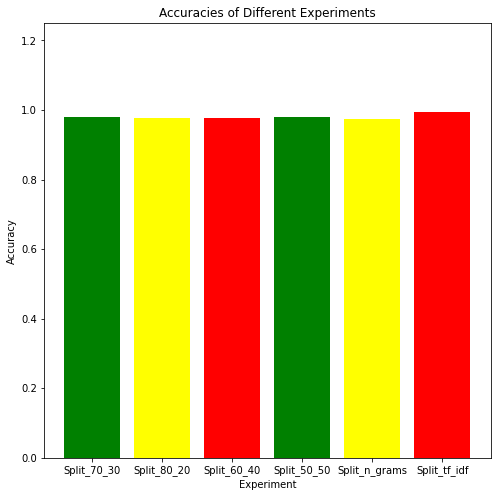

In [79]:

# Plot the data
plt.figure(figsize=(8,8))
plt.bar(exp, accuracies, color=['green','yellow','red'])
plt.ylim(0, 1.25) 
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Experiments')
plt.show()


In [ ]:
#END.